In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import im_utils
import object_detection
from object_detection import ObjectDetector
import time

In [3]:
labels = {}
with open('ssd/label_mapping.csv') as f:
    lines = [(x.split(',')[0], x.split(',')[1].strip()) for x in f.readlines()]
    labels = {int(x[0]): x[1] for x in lines}
    f.close()

In [4]:
labels[1] = 'Leopard'
labels[2] = 'Elephant'
labels[3] = 'Tiger'
labels[4] = 'Human'

In [5]:
start = time.time()
det = ObjectDetector('ssd_elp_heads_35k/saved_model/')
det.loadModel()
det.getBoundingBoxes(cv2.imread('amur_small/002019.jpg'))
print('Model Load Time: {:.3f}s'.format(time.time() - start))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
Model Load Time: 17.895s


In [6]:
det.SCORE_THRESHOLD = 0.6
det.IOU_THRESHOLD = 0.5

In [13]:
def detectAndShow(imname):
    image = cv2.imread(imname)
    image = cv2.resize(image, (300,300))
    start = time.time()
    res, image = det.getBoundingBoxes(image)
    print('Inference Time: {:.3f}s'.format(time.time() - start))
    for r in res:
        image = im_utils.drawBoundingBoxWithLabel(image, r, labels, thickness=4)
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    ax.imshow(image[:,:,(2,1,0)])
    return res

Inference Time: 0.077s


[DetectionResult(bounding_box=BoundingBox(ymin=144, xmin=99, ymax=262, xmax=137), confidence=0.8216866, classid=3)]

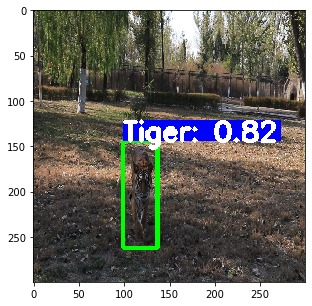

In [14]:
detectAndShow('amur/detection_train/trainval/1231.jpg')

Inference Time: 0.149s


[]

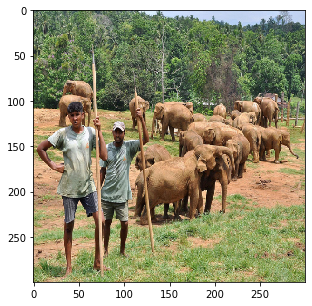

In [15]:
detectAndShow('coco/val/000000173799.jpg')

Inference Time: 0.108s


[DetectionResult(bounding_box=BoundingBox(ymin=6, xmin=17, ymax=292, xmax=275), confidence=0.97875285, classid=2)]

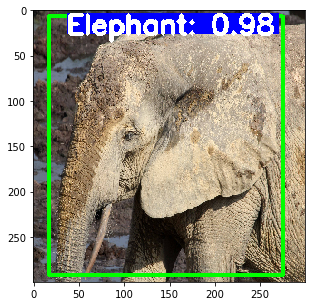

In [16]:
detectAndShow('elp_small/2241_Khysie I left head_2014.jpg')

Inference Time: 0.133s


[DetectionResult(bounding_box=BoundingBox(ymin=109, xmin=205, ymax=213, xmax=254), confidence=0.8621641, classid=3)]

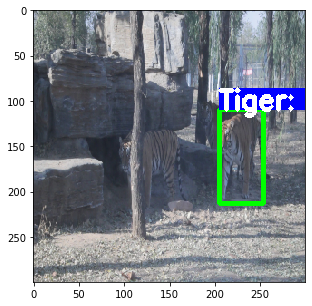

In [17]:
detectAndShow('amur/detection_train/trainval/1474.jpg')

Inference Time: 0.116s


[DetectionResult(bounding_box=BoundingBox(ymin=106, xmin=36, ymax=223, xmax=175), confidence=0.9953865, classid=1)]

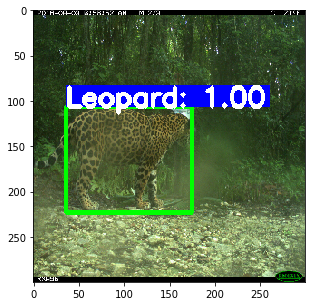

In [18]:
detectAndShow('jaguars/unknown6_1.jpg')

Inference Time: 0.269s


[]

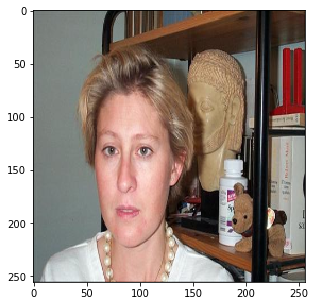

In [25]:
detectAndShow('caltech/101_ObjectCategories/Faces/image_0271.jpg')